In [5]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
# cancerData = pd.read_csv('data1.csv')
# cancerData.shape
cancerData = datasets.load_breast_cancer()

In [20]:
cancerData = pd.DataFrame(cancerData )

In [23]:
X = pd.DataFrame(data = cancerData.data, columns=cancerData.feature_names )
X.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [17]:
cancerData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [24]:
y = cancerData.target

In [25]:
X.shape

(569, 30)

# spiliting the dataset

In [53]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,stratify=y)

In [54]:
X_train.shape

(455, 30)

In [55]:
y_test.shape

(114,)

#Applying StandardScaler()

In [56]:
scaler = StandardScaler()

In [57]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshaping the dataset to 3-D to pass it through CNN

In [58]:
X_train = X_train.reshape(455,30,1)
X_test = X_test.reshape(114,30,1)

# Preparing the Model

In [59]:
model = Sequential()
model.add(Conv1D(filters=16,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(32,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 29, 16)            48        
                                                                 
 batch_normalization_2 (Batc  (None, 29, 16)           64        
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 29, 16)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 28, 32)            1056      
                                                                 
 batch_normalization_3 (Batc  (None, 28, 32)           128       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 28, 32)           

In [61]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [62]:
history = model.fit(X_train,y_train,epochs=35,verbose=1,validation_data=(X_test,y_test))

Epoch 1/35
15/15 [==============================] - 1s 17ms/step - loss: 1.0511 - accuracy: 0.4681 - val_loss: 0.6766 - val_accuracy: 0.5351
Epoch 2/35
15/15 [==============================] - 0s 6ms/step - loss: 0.7172 - accuracy: 0.6527 - val_loss: 0.6173 - val_accuracy: 0.8596
Epoch 3/35
15/15 [==============================] - 0s 7ms/step - loss: 0.5751 - accuracy: 0.7538 - val_loss: 0.5636 - val_accuracy: 0.9123
Epoch 4/35
15/15 [==============================] - 0s 6ms/step - loss: 0.4092 - accuracy: 0.8330 - val_loss: 0.5186 - val_accuracy: 0.9123
Epoch 5/35
15/15 [==============================] - 0s 7ms/step - loss: 0.3453 - accuracy: 0.8681 - val_loss: 0.4753 - val_accuracy: 0.9123
Epoch 6/35
15/15 [==============================] - 0s 7ms/step - loss: 0.3474 - accuracy: 0.8593 - val_loss: 0.4352 - val_accuracy: 0.9123
Epoch 7/35
15/15 [==============================] - 0s 7ms/step - loss: 0.2767 - accuracy: 0.8945 - val_loss: 0.3963 - val_accuracy: 0.9386
Epoch 8/35
15/15 [=

# Plots of Accuracy and Loss

In [63]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

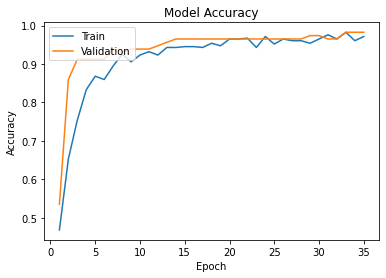

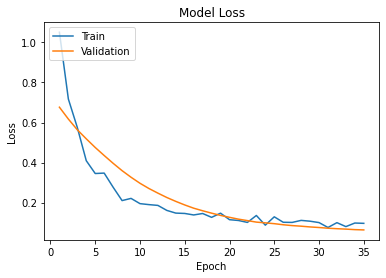

In [64]:
plotLearningCurve(history,35)

In [74]:
# Evaluate the model on the test data and print the accuracy
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Model accuracy on test data: '{accuracy:.2%}'")


4/4 [==============================] - 0s 3ms/step - loss: 0.0635 - accuracy: 0.9825
Model accuracy on test data: '98.25%'
